<a href="https://colab.research.google.com/github/Elmira-Rakhmetova/ML-Audit-project/blob/main/MLMNC_Group_Project_Team_6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLMNC Group Project - Team 6

# 0 - Import of Data & Dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
audit_risk = pd.read_csv('https://raw.githubusercontent.com/Elmira-Rakhmetova/ML-Audit-project/main/audit_risk.csv')
trial_original = pd.read_csv('https://raw.githubusercontent.com/Elmira-Rakhmetova/ML-Audit-project/main/trial.csv')

# 1 - Data Exploration & Preparation 

In [ ]:
# how does the data look like?
trial_original.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [ ]:
# brief data description 
trial_original.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


## Data preprocessing

In [ ]:
trial = trial_original.copy()

In [ ]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

We observe `object` datatype in column "LOCATION ID"; as it is supposed to be a numerical variable, we have to exlude the rows with text:

In [ ]:
trial.LOCATION_ID.unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
trial = trial[(trial.LOCATION_ID != 'LOHARU')]
trial = trial[(trial.LOCATION_ID != 'NUH')]
trial = trial[(trial.LOCATION_ID != 'SAFIDON')]
trial = trial.astype(float)

We also observe 1 `nan` value in column "Money_Value" and need to exlude it: 

In [ ]:
trial = trial.dropna()

In [ ]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   772 non-null    float64
 1   LOCATION_ID    772 non-null    float64
 2   PARA_A         772 non-null    float64
 3   SCORE_A        772 non-null    float64
 4   PARA_B         772 non-null    float64
 5   SCORE_B        772 non-null    float64
 6   TOTAL          772 non-null    float64
 7   numbers        772 non-null    float64
 8   Marks          772 non-null    float64
 9   Money_Value    772 non-null    float64
 10  MONEY_Marks    772 non-null    float64
 11  District       772 non-null    float64
 12  Loss           772 non-null    float64
 13  LOSS_SCORE     772 non-null    float64
 14  History        772 non-null    float64
 15  History_score  772 non-null    float64
 16  Score          772 non-null    float64
 17  Risk           772 non-null    float64
dtypes: float64

## Variable analysis: correlations
The relationships between the variables are firstly analyzed through correlation matrix: 

In [ ]:
trial.corr(method='pearson').style.format('{:.2f}').background_gradient()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.00,-0.06,-0.22,-0.43,-0.13,-0.22,-0.15,-0.15,-0.17,-0.12,-0.32,-0.11,-0.08,-0.09,-0.12,-0.14,-0.34,-0.38
LOCATION_ID,-0.06,1.00,-0.00,0.08,0.01,0.13,0.01,0.01,-0.02,-0.07,0.11,-0.11,0.01,-0.00,-0.08,-0.05,0.09,0.05
PARA_A,-0.22,-0.00,1.00,0.50,0.16,0.36,0.27,0.13,0.14,0.45,0.29,0.13,0.05,0.04,0.12,0.17,0.43,0.29
SCORE_A,-0.43,0.08,0.50,1.00,0.25,0.57,0.30,0.24,0.27,0.21,0.48,0.09,0.09,0.09,0.18,0.26,0.72,0.67
PARA_B,-0.13,0.01,0.16,0.25,1.00,0.35,0.99,0.21,0.23,0.12,0.31,0.08,0.04,0.04,0.20,0.32,0.40,0.16
SCORE_B,-0.22,0.13,0.36,0.57,0.35,1.00,0.38,0.28,0.31,0.20,0.57,-0.01,0.10,0.09,0.20,0.31,0.90,0.51
TOTAL,-0.15,0.01,0.27,0.30,0.99,0.38,1.00,0.22,0.24,0.17,0.34,0.09,0.05,0.05,0.21,0.33,0.43,0.19
numbers,-0.15,0.01,0.13,0.24,0.21,0.28,0.22,1.00,0.91,0.19,0.45,0.12,-0.00,0.04,0.20,0.21,0.50,0.20
Marks,-0.17,-0.02,0.14,0.27,0.23,0.31,0.24,0.91,1.00,0.22,0.51,0.15,0.00,0.04,0.23,0.25,0.57,0.23
Money_Value,-0.12,-0.07,0.45,0.21,0.12,0.20,0.17,0.19,0.22,1.00,0.39,0.03,0.02,0.03,0.08,0.11,0.29,0.16


In [ ]:
trial.corr(method='spearman').style.format('{:.2f}').background_gradient()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.00,-0.02,-0.39,-0.38,-0.14,-0.10,-0.31,-0.07,-0.07,-0.17,-0.14,-0.15,-0.08,-0.09,-0.05,-0.05,-0.31,-0.37
LOCATION_ID,-0.02,1.00,0.07,0.07,0.10,0.11,0.11,-0.03,-0.03,0.06,0.09,-0.09,0.00,-0.01,-0.03,-0.03,0.07,0.05
PARA_A,-0.39,0.07,1.00,0.91,0.53,0.54,0.82,0.28,0.28,0.46,0.45,0.08,0.10,0.10,0.27,0.27,0.72,0.65
SCORE_A,-0.38,0.07,0.91,1.00,0.54,0.56,0.79,0.29,0.29,0.48,0.49,0.08,0.10,0.10,0.28,0.28,0.77,0.69
PARA_B,-0.14,0.10,0.53,0.54,1.00,0.83,0.85,0.32,0.32,0.58,0.55,-0.04,0.07,0.06,0.30,0.30,0.72,0.46
SCORE_B,-0.10,0.11,0.54,0.56,0.83,1.00,0.78,0.33,0.33,0.58,0.57,-0.00,0.10,0.09,0.32,0.32,0.82,0.53
TOTAL,-0.31,0.11,0.82,0.79,0.85,0.78,1.00,0.32,0.32,0.59,0.55,0.02,0.10,0.10,0.30,0.30,0.84,0.69
numbers,-0.07,-0.03,0.28,0.29,0.32,0.33,0.32,1.00,1.00,0.42,0.51,0.14,0.03,0.05,0.23,0.23,0.46,0.24
Marks,-0.07,-0.03,0.28,0.29,0.32,0.33,0.32,1.00,1.00,0.42,0.51,0.14,0.03,0.05,0.23,0.23,0.46,0.24
Money_Value,-0.17,0.06,0.46,0.48,0.58,0.58,0.59,0.42,0.42,1.00,0.80,0.06,0.12,0.13,0.31,0.31,0.68,0.46


**Observations based on the correlation matrix:**
*   the difference between the correlation coefficients computed with Pearson and Spearman methods indicates the non-linear relationships between the variables; 
*   the output variable Risk is positively correlated with all the input variables except for Sector_score;
*   the output variable Risk is highly correlated (Spearman coefficient > 0.50) with the following variables: PARA_A, SCORE_A, SCORE_B, TOTAL, and Score (highest correlation of 0.86);
*   as for the correlations between the inputs, we observe the highest correlations (Spearman coefficient >= 0.80) between the variables PARA_A and SCORE_A (0.91), PARA_B and SCORE_B (0.83), TOTAL and PARA_A (0.82), TOTAL and PARA_B (0.85), LOSS_SCORE and Loss (0.98), Marks and numbers (1.00), MONEY_Marks and Money_Value (0.80), History_score and History (1.00).

**Assumption:** some of the high correlation coefficients between the variables might suggest that in some pairs of the attributes (e.g. PARA_A & SCORE_A) one variable is derived from another one. We will double check this assumption via applying RandomForestRegressor to better understand the relationships between the variables.

## Varible analysis: modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

variables = trial.columns 

x_explains_y = pd.DataFrame(index=variables, columns=variables, dtype=np.float)
for xname in variables:
    for yname in variables:
        X = trial[[xname]].values
        y = trial[yname]
        
        rf = RandomForestRegressor(n_estimators=50, oob_score=True)
        rf.fit(X, y)
        
        x_explains_y.loc[xname, yname] = rf.oob_score_

In [ ]:
x_explains_y.style.background_gradient(low=0, high=1).format('{:.2f}')

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.00,0.01,0.04,0.26,0.07,0.19,0.07,0.06,0.07,0.02,0.28,0.06,-0.00,-0.01,0.02,0.02,0.27,0.21
LOCATION_ID,-0.03,1.00,-0.02,-0.01,-0.03,-0.01,-0.02,-0.09,0.03,0.02,0.01,0.26,-0.04,-0.03,-0.03,-0.05,0.02,0.02
PARA_A,0.03,-0.27,0.98,1.00,0.00,0.10,-0.16,-0.27,-0.35,-0.39,-0.09,-0.27,-0.36,-0.41,-0.30,-0.33,0.37,0.44
SCORE_A,0.18,0.00,0.26,1.00,0.06,0.33,0.09,0.05,0.07,0.03,0.22,0.00,-0.00,-0.00,0.03,0.07,0.52,0.53
PARA_B,-0.05,-0.24,-0.08,0.09,0.35,0.79,0.37,-0.00,-0.21,-0.24,0.32,-0.33,-0.14,-0.10,-0.65,-0.33,0.71,0.15
SCORE_B,0.04,0.01,0.12,0.32,0.12,1.00,0.14,0.07,0.09,0.04,0.32,-0.01,0.00,0.00,0.04,0.09,0.81,0.29
TOTAL,-0.09,-0.33,-0.19,0.55,0.33,0.65,0.41,-0.35,-0.27,-0.45,0.15,-0.39,-0.32,-0.36,-0.53,-0.39,0.72,0.37
numbers,0.03,0.00,0.01,0.08,0.05,0.11,0.03,0.88,1.00,0.03,0.27,0.00,-0.01,-0.02,0.01,0.03,0.34,0.06
Marks,0.03,0.00,0.01,0.08,0.03,0.11,0.05,0.82,1.00,0.03,0.27,0.01,-0.00,-0.01,0.03,0.05,0.34,0.06
Money_Value,-0.03,-0.29,0.00,0.07,-0.55,0.19,-0.70,-0.00,-0.03,0.98,1.00,-0.23,-0.29,-0.24,-0.27,-0.33,0.46,0.14


**Observations based on the model:** 


*   A number of variables are not independent and can be explained through other variables in the dataset;
*   Such input variables are as follows: SCORE_A (explained by: PARA_A), (PARA_B), Marks (numbers), MONEY_Marks (Money_Value), LOSS_SCORE (Loss), History_score (History); 
*   The same applies to the variable pair Score and Risk: total risk score of a firm calculated through the analytical procedure (variable Score) fully explains the risk class assigned to a firm (output variable Risk). 




## Variables short-list

For the modelling purposes, we select the subset of the truly independent variables, which are presented in the list below:

- **Sector_score**: Historical risk score value of the sector; 
- **PARA_A**: Discrepancy found in the plannedexpenditure of inspection and summary report A in Rs (in crore)
- **PARA_B**: Discrepancy found in the unplannedexpenditure of inspection and summary report B in Rs (in crore)
- **TOTAL**: Total amount of discrepancy found in other reports Rs (in crore)
- **numbers**: Historical discrepancy score
- **Money_Value**: Amount of money involved in misstatements in the past audits
- **District**: Historical risk score of a district in the last 10 years
- **Loss**: Amount of loss suffered by the firm last year
- **History**: Average historical loss suffered by firm in the last 10 years
- **Risk** *(output variable)*: Risk Class assigned to an audit-case 

As `LOCATION_ID` attribute does not hold any relevant information in terms of identifying whether a firm is potentially fraudulent or not, we will not include in the classification model; however, we will use it in the end to cluster potentially fraudulent firms and see whether they tend to concentrate in some location(s)

In [ ]:
xnames = ['Sector_score', 'PARA_A','PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'District', 'Loss', 'History']
yname = 'Risk'

## ? Normalizing data

To get better results for our model, we need to normalize the input variables:

In [ ]:
# setting x and y
x = trial[xnames]
y = trial[yname].astype(int) # y values can only be 1 or 0, that is why they are changed into an integer

# converting values into a numpy array (not sure if this step is necessary)
x = np.array(x)
y = np.array(y)

In [ ]:
# this uses the keras normalizing method
x = tf.keras.utils.normalize(x)

## Splitting data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # train_test_split was imported in the beginning

## Final checkups
Here's a summary of what the data looks like now

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(540, 9)
(540,)
(232, 9)
(232,)


# 2 - Modelling & Evaluation 



## 2.1 K_Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
kn_model = KNeighborsClassifier()
grid_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
gs = GridSearchCV (KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)
gs_results = gs.fit(x_train, y_train)
kn_model.fit(x_train, y_train)
kn_model.predict(x_train)
print(kn_model.score(x_train, y_train), kn_model.score(x_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.987037037037037 0.9612068965517241


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


Visualization:

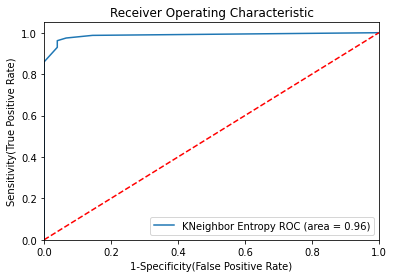

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_predict_r = kn_model.predict(x_test)
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [{'label': 'KNeighbor Entropy','model': KNeighborsClassifier(),},]

# Below for loop iterates through your models list
for m in models:
    model = kn_model # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

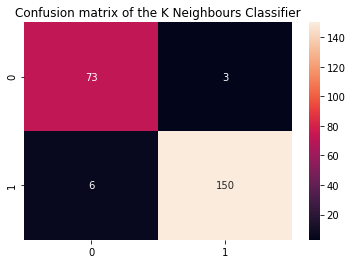

In [ ]:
# Plot the confusion matrix of kn
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
import seaborn as sns
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the K Neighbours Classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

## 2.2 RandomForest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
print(rf_model.score(x_train, y_train), rf_model.score(x_test, y_test))

1.0 0.9310344827586207


Parameter optimization:

In [ ]:
rf_grid_params = {'max_features': ['auto','sqrt','log2'], 'n_estimators' : [10,50,100,200], 'max_depth' :['None',4,5,6,7,8], 'criterion': ['gini','entropy']}
gs = GridSearchCV (RandomForestClassifier(), rf_grid_params, verbose = 1, cv = 3, n_jobs = -1)
gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   39.3s finished


In [ ]:
print(rf_model.score(x_train, y_train), rf_model.score(x_test, y_test))

1.0 0.9396551724137931


Visualization:

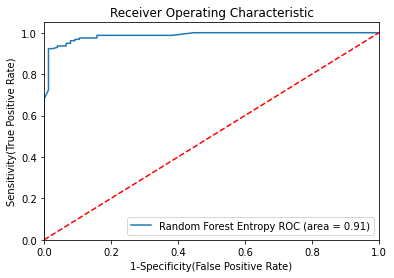

In [ ]:
y_predict_r = rf_model.predict(x_test)
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()
# Add the models to the list that you want to view on the ROC plot
models = [{'label': 'Random Forest Entropy','model': RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47),},]

# Below for loop iterates through your models list
for m in models:
    model = rf_model # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

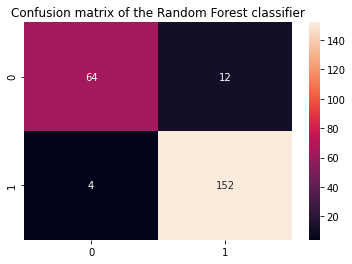

In [ ]:
# Plot the confusion matrix of rf
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
import seaborn as sns
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

## 2.3 DecisionTree (DT)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(x_train, y_train)
print(dt_model.score(x_train, y_train), dt_model.score(x_test, y_test))


1.0 0.9310344827586207


Visualization:

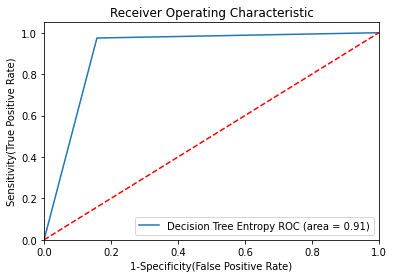

In [ ]:
y_predict_d = dt_model.predict(x_test)

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [{'label': 'Decision Tree Entropy','model': DecisionTreeClassifier(),},]

# Below for loop iterates through your models list
for m in models:
    model = dt_model # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

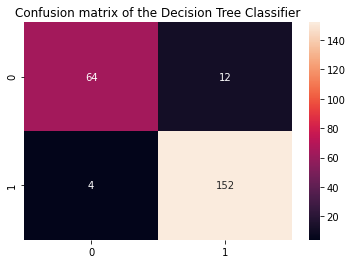

In [ ]:
# Plot the confusion matrix of dt
cm_d = confusion_matrix(y_test, y_predict_d)
plt.title('Confusion matrix of the Decision Tree Classifier')
sns.heatmap(cm_d,annot=True,fmt="d")
plt.show()

Computation of confusion matrix:

In [ ]:
risk_pred_test = dt_model.predict(x_test)
conf_mat = confusion_matrix(y_test, risk_pred_test)
conf_mat
conf_mat.ravel()
tn, fp, fn, tp = conf_mat.ravel()
print('true negatives:', tn)
print('false positives:', fp)
print('false negatives:', fn)
print('true positives:', tp)

true negatives: 64
false positives: 12
false negatives: 4
true positives: 152


The confusion matrix shows that the model correctly predicts the risk class of the firm in 216 out of 232 cases (for the test data), which corresponds to the accuracy of 0.93

## 2.4 Neural Network (NN)

Sources:

https://www.tensorflow.org/tutorials/load_data/csv

In [ ]:
nn_model = tf.keras.models.Sequential([
tf.keras.layers.InputLayer(input_shape=(9)),
tf.keras.layers.Dense(2)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# making a few checks (not necessary anymore)
'''predictions = model(x_train[:1]).numpy()
print(f"(testing) Predictions are working: {predictions}")
print(f"(testing) Loss function is working: {loss_fn(y_train[:1], predictions).numpy()}")
print(f"The input shape of tf_x_train is: {x_train.shape}")
print(f"The input shape of tf_y_train is: {y_train.shape}\n")
print(f"Example entry of tf_x_train array: {x_train[0]}\n")
print(f"Example entry of tf_y_train array: {y_train[0]}\n"'''

nn_model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

result = nn_model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.3148
Epoch 2/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.3222
Epoch 3/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.3241
Epoch 4/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.8219 - accuracy: 0.3278
Epoch 5/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.8090 - accuracy: 0.3315
Epoch 6/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.7962 - accuracy: 0.3444
Epoch 7/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.7841 - accuracy: 0.3611
Epoch 8/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.3852
Epoch 9/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.7609 - accuracy: 0.4315
Epoch 10/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.4537

In [ ]:
nn_model.weights

[<tf.Variable 'dense/kernel:0' shape=(9, 2) dtype=float32, numpy=
 array([[ 0.6210059 , -0.9240437 ],
        [-8.424803  ,  8.007538  ],
        [-0.5944021 , -0.36365524],
        [-4.6009607 ,  4.379452  ],
        [ 4.540544  , -4.2791295 ],
        [-1.5686415 ,  1.2370588 ],
        [-4.1093388 ,  4.716619  ],
        [-3.5203311 ,  3.89679   ],
        [-5.002318  ,  4.863034  ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.4567275 ,  0.45672745], dtype=float32)>]

In [ ]:
nn_model.evaluate(x_test,  y_test, verbose=2)

8/8 - 0s - loss: 0.2376 - accuracy: 0.8922


[0.23755016922950745, 0.892241358757019]

## 2.5 Deep Neural Network (DNN)

In [ ]:
dnn_model = tf.keras.models.Sequential([
tf.keras.layers.InputLayer(input_shape=(9)),
tf.keras.layers.Dense(50, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dense(2)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

dnn_model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

result = dnn_model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6778
Epoch 2/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7037
Epoch 3/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7056
Epoch 4/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7500
Epoch 5/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7796
Epoch 6/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8093
Epoch 7/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8130
Epoch 8/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8315
Epoch 9/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8130
Epoch 10/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8222

In [ ]:
dnn_model.evaluate(x_test,  y_test, verbose=2)

8/8 - 0s - loss: 0.1280 - accuracy: 0.9612


[0.12800918519496918, 0.9612069129943848]

# 3 - Results

# 4 - Final remarks

# 5 - Appendix 